In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px
import seaborn as sns

In [2]:

df = pd.read_csv("Stock.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Unnamed: 0"])
df.set_index("Date", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1243 entries, 2019-02-04 to 2024-02-02
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P_500_Price     1243 non-null   float64
 1   Nasdaq_100_Price  1243 non-null   float64
 2   Nasdaq_100_Vol.   1243 non-null   float64
 3   Apple_Price       1243 non-null   float64
 4   Apple_Vol.        1243 non-null   float64
 5   Tesla_Price       1243 non-null   float64
 6   Tesla_Vol.        1243 non-null   float64
 7   Microsoft_Price   1243 non-null   float64
 8   Microsoft_Vol.    1243 non-null   float64
 9   Google_Price      1243 non-null   float64
 10  Google_Vol.       1243 non-null   float64
 11  Nvidia_Price      1243 non-null   float64
 12  Nvidia_Vol.       1243 non-null   float64
 13  Berkshire_Price   1243 non-null   float64
 14  Berkshire_Vol.    1243 non-null   float64
 15  Netflix_Price     1243 non-null   float64
 16  Netflix_Vol.      1243 n

In [4]:
df.describe()

,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Google_Price,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.
count,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,...,1243.000000,1.243000e+03,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03
mean,3793.322542,12037.318101,2.238760e+08,125.566533,9.981845e+07,173.590442,1.341790e+08,241.240072,2.920801e+07,99.670829,...,187.285841,4.560298e+07,404273.051488,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07
std,632.321579,2887.069742,8.243706e+07,46.114122,5.208192e+07,106.688094,8.509129e+07,73.429838,1.236710e+07,29.766893,...,134.679941,1.869107e+07,86369.903899,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07
min,2237.400000,6904.980000,5.047000e+07,42.360000,2.404000e+07,11.930000,2.940000e+07,105.250000,8.990000e+06,51.940000,...,33.450000,9.790000e+06,240000.000000,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06
25%,3190.640000,9298.730000,1.715350e+08,79.505000,6.599000e+07,53.335000,8.136000e+07,182.525000,2.153500e+07,71.185000,...,73.905000,3.245000e+07,318984.500000,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07
50%,3932.690000,12381.170000,2.116200e+08,136.760000,8.749000e+07,202.070000,1.095200e+08,245.380000,2.610000e+07,101.240000,...,151.590000,4.279000e+07,418349.000000,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07
75%,4349.240000,14563.250000,2.559300e+08,162.915000,1.170750e+08,251.470000,1.578300e+08,297.120000,3.317500e+07,127.205000,...,242.140000,5.511500e+07,471500.000000,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07
max,4958.610000,17642.730000,9.825600e+08,198.110000,4.268800e+08,409.970000,9.140800e+08,411.220000,9.707000e+07,153.510000,...,661.600000,1.534600e+08,589498.000000,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08


In [5]:
def heatmap_corr(df):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(df, dtype=bool))
    df = df.iloc[1:, :-1]
    sns.heatmap(df, mask=mask[1:,:-1], cmap='coolwarm', fmt=".2f", linewidths=0.5,annot=True,vmin=-1,vmax=1)
    plt.title('Biểu đồ Heatmap tương quan')
    plt.show()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


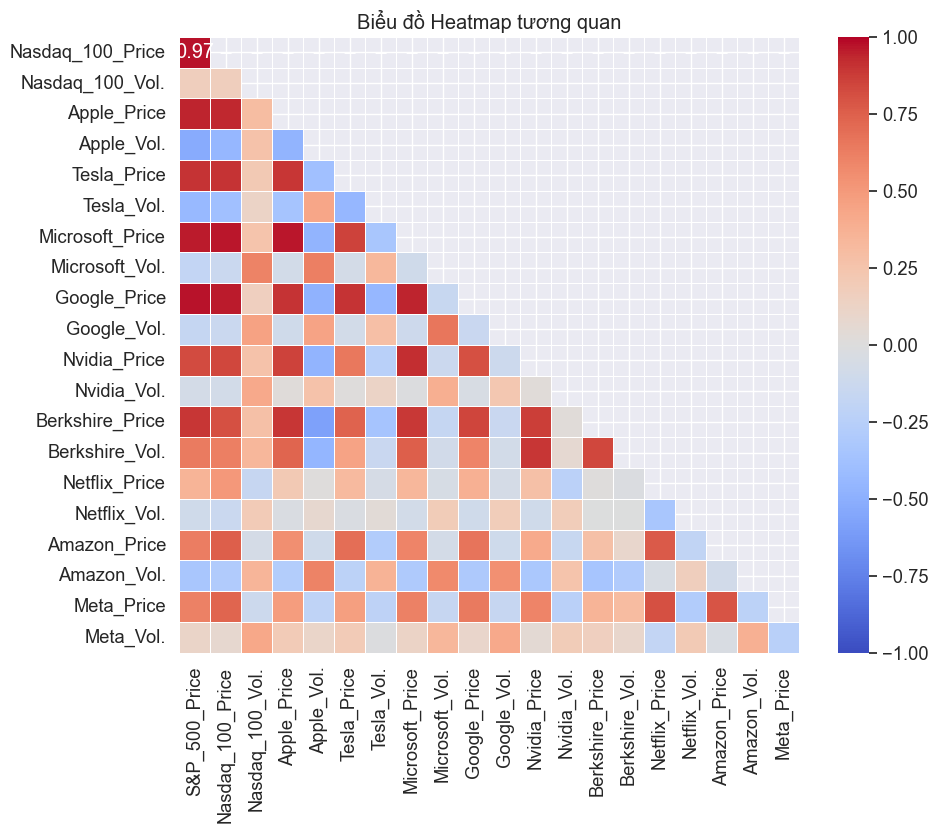

In [6]:
heatmap_corr(df.corr())

In [10]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
name = [x.replace('_Price','') for x in price]


In [88]:
growth_rates = {}

for stock in price:
    start_price = df[stock].iloc[0]
    end_price = df[stock].iloc[-1]
    growth_rate = (end_price - start_price) / start_price * 100
    growth_rates[stock] = growth_rate
df_growth = pd.DataFrame(list(growth_rates.items()), columns=['Stock', 'Growth Rate'])
fig = px.bar(df_growth, x='Growth Rate', y='Stock', orientation='h', labels={'Growth Rate': 'Growth Rate (%)', 'Stock': 'Stock'}, title='Thông kê tốc độ tăng trưởng')
fig.show()

In [23]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

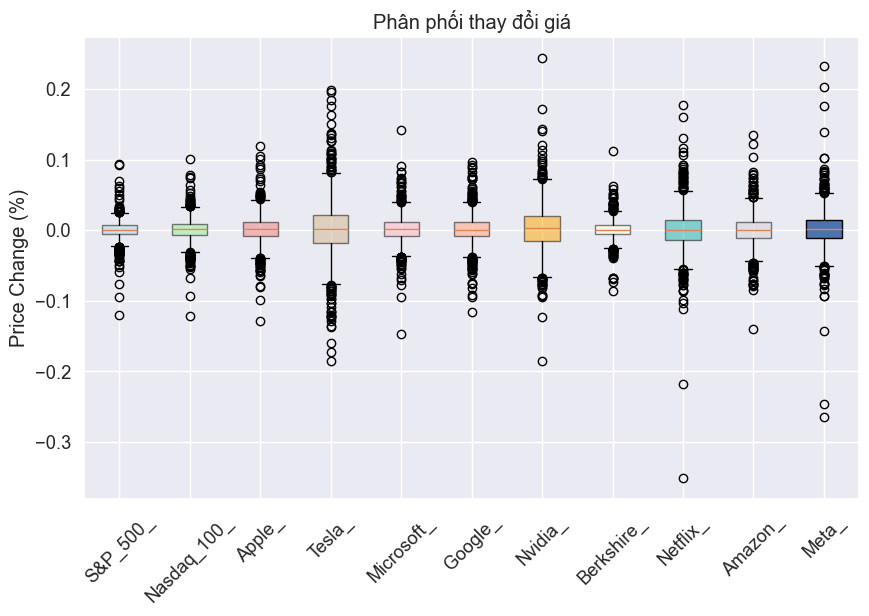

In [25]:
daily_return_array = df[price].pct_change().dropna()

plt.figure(figsize=(10, 6))
box = plt.boxplot(daily_return_array.values, labels=name, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'tan', 'lightpink', 'lightsalmon', 'orange', 'lightyellow', 'lightseagreen', 'lightgray']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color, alpha=0.5)  # Tinh chỉnh màu sắc và độ trong suốt

plt.title('Phân phối thay đổi giá')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)

plt.show()

In [89]:
df_price = df[price]
df_price_new= df_price/df_price.iloc[0]

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



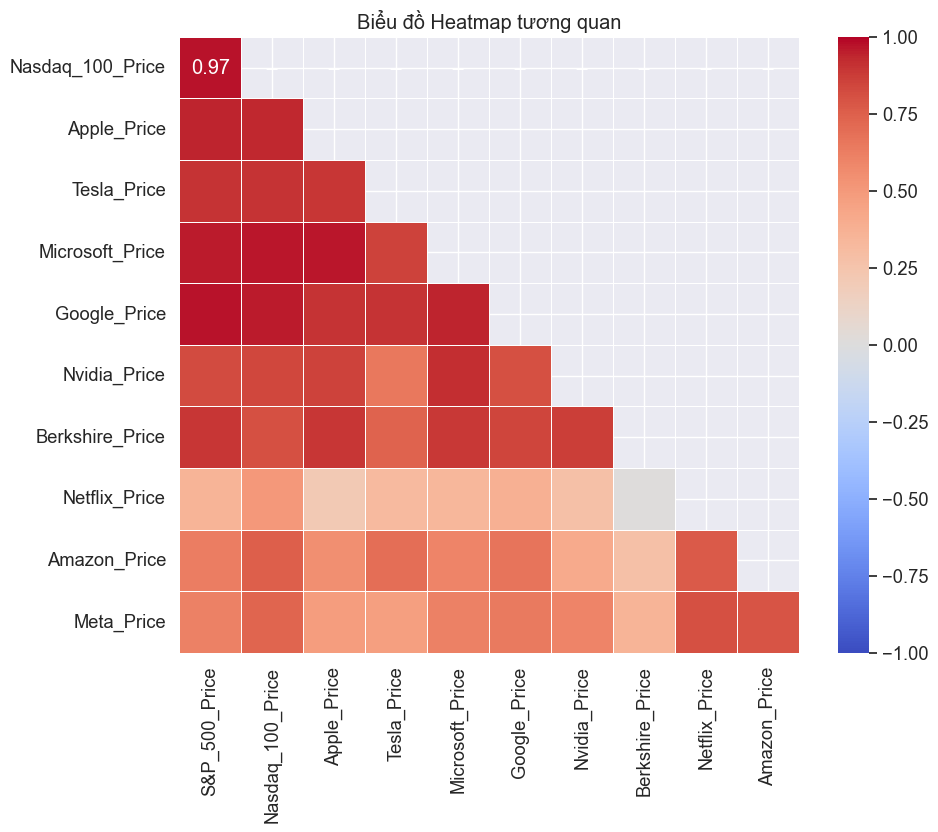

In [90]:
df_corr_price = df_price_new.corr()
heatmap_corr(df_corr_price)

In [91]:
fig = px.line(data_frame=df_price_new,title='Bảng thông kê giá cả tổng quan')
fig.show()

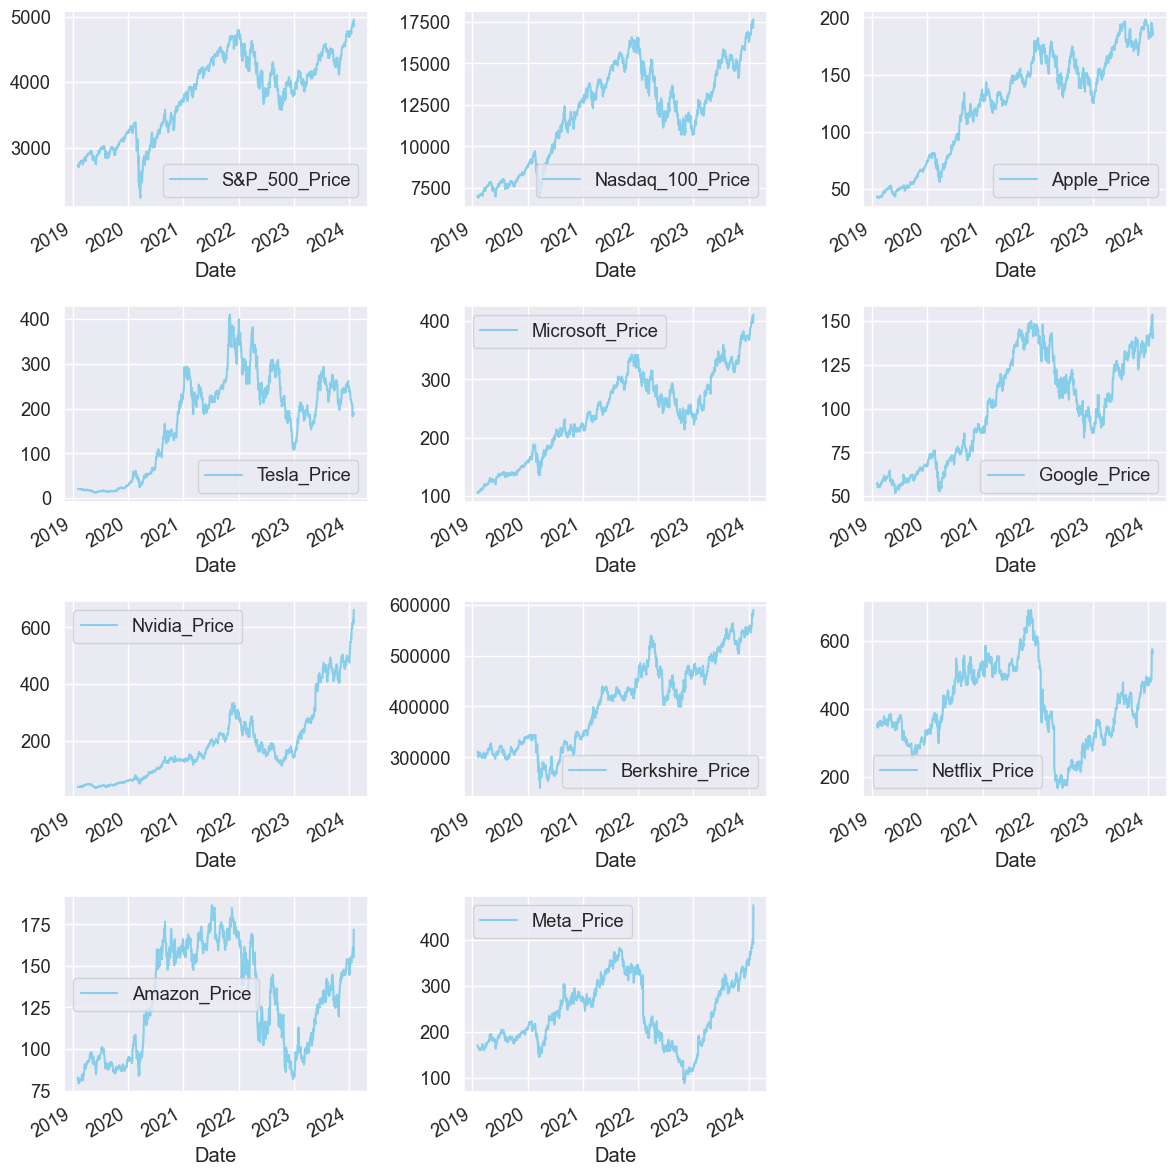

In [115]:
n_cols = 3
n_rows = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # index to loop through list "cols"
        if i < len(price):
            ax_i = ax[r, c]
            df.plot(y=price[i], figsize=(12,12), ax=ax_i,color='skyblue')
ax.flat[-1].set_visible(False) 
plt.tight_layout()
plt.show()

In [93]:
daily_return = [x.replace('Price','Daily_Return') for x in price]
name = [x.replace('Price', '') for x in price]
df[daily_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [94]:
mean_daily_return_day = 0
mean_daily_return_year = 0
price_volatility=0
mean_daily_return_array_day = []
mean_daily_return_array_year = []
price_volatility_array =[]
for i in daily_return :
    mean_daily_return_day = df[i].mean()
    mean_daily_return_year=mean_daily_return_day*365
    price_volatility = df[i].std()
    price_volatility_array.append(price_volatility)
    mean_daily_return_array_day.append(mean_daily_return_day)
    mean_daily_return_array_year.append(mean_daily_return_year)
    

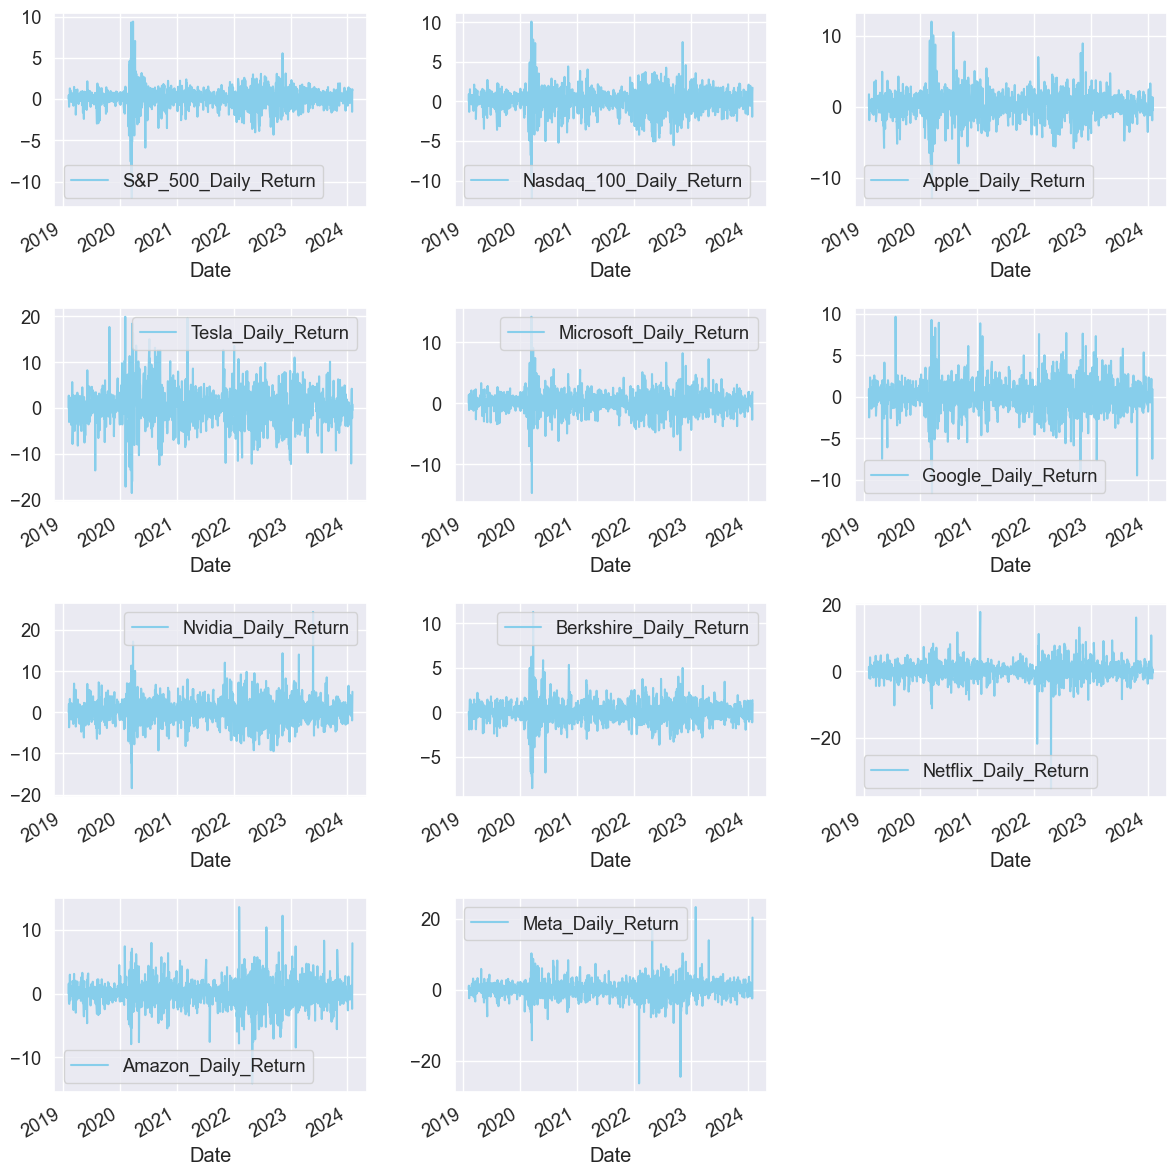

In [95]:
n_cols = 3
n_rows = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # index to loop through list "cols"
        if i < len(daily_return):
            ax_i = ax[r, c]
            df.plot(y=daily_return[i], figsize=(12,12), ax=ax_i,color='skyblue')
ax.flat[-1].set_visible(False) 
plt.tight_layout()
plt.show()

Đậy là loại dashboard cơ mà cột không nhất thiết phải dashboard

In [96]:
# data_visual = pd.DataFrame({'Stock': price, 'Price_Volatility': price_volatility_array, 'Year_Return': mean_daily_return_array_year})

# fig = px.histogram(data_frame=data_visual, x='Stock', y='Year_Return',title='Bảng trung bình lợi nhuận hàng năm')
# fig.show()

In [97]:
# fig = px.histogram(data_frame=data_visual, x='Stock', y='Price_Volatility',title='Bảng biến động giá hàng ngày')
# fig.show()

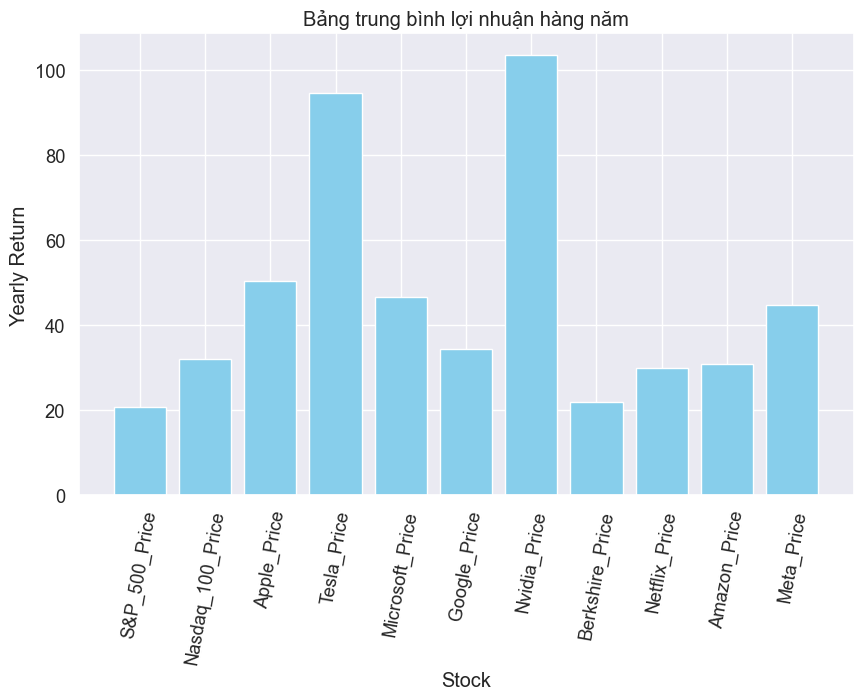

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(price, mean_daily_return_array_year,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng trung bình lợi nhuận hàng năm')
plt.xticks(rotation=80)
plt.show()

Biến động càng thấp càng đáng đầu tư

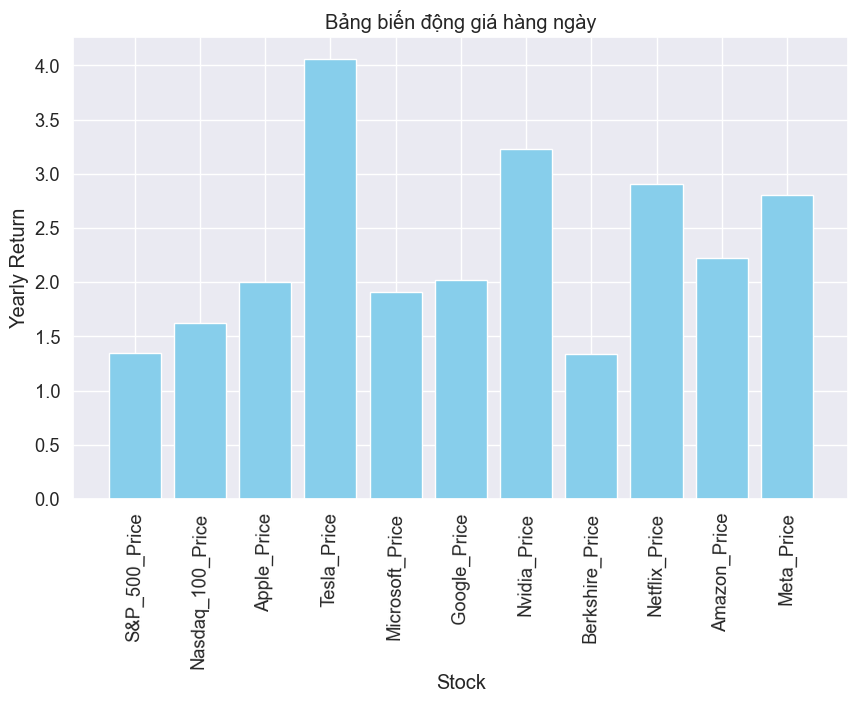

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(price, price_volatility_array,color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Yearly Return')
plt.title('Bảng biến động giá hàng ngày')
plt.xticks(rotation=89)
plt.show()

In [100]:
high_corr_pairs = {}
for column in df_corr_price.columns:
    high_corr_columns = df_corr_price[column][(df_corr_price[column]) >= 0].index
    for corr_column in high_corr_columns:
        if column != corr_column:
            key = f"{column}/{corr_column}"
            value = df_corr_price[column][corr_column]
            high_corr_pairs[key] = value

In [101]:
# def remove_duplicate_values(x):
#     unique_dict = {}
#     seen_values = set()
#     for key, value in x.items():
#         if value not in seen_values:
#             unique_dict[key] = value
#             seen_values.add(value)
#     return unique_dict

# high_corr_pairs = remove_duplicate_values(high_corr_pairs)

In [102]:
keys_list = list(high_corr_pairs)

Lưu ý không kiến nghị chạy đoạn code vì đã lưu plot thành ảnh r , nếu chạy bỏ # đi

In [103]:

# n_cols = 6
# n_rows = 18
# fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

# for r in range(n_rows):
#     for c in range(n_cols):
#         i = r * n_cols + c
#         if i < len(keys_list):
#             ax_i = ax[r, c]
#             separated_columns = keys_list[i].split('/')
#             ax_i.plot(df_price_new.index, df_price_new[separated_columns[0]], label=separated_columns[0])
#             ax_i.plot(df_price_new.index, df_price_new[separated_columns[1]], label=separated_columns[1])
#             ax_i.set_xlabel('Ngày')
#             ax_i.set_ylabel('Giá')
#             ax_i.legend()

# plt.tight_layout()
# plt.show()

In [125]:
df_volume=df[volume]
df_corr_volume = df_volume.corr()

c:\Users\Admin\anaconda3\envs\env_ds\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



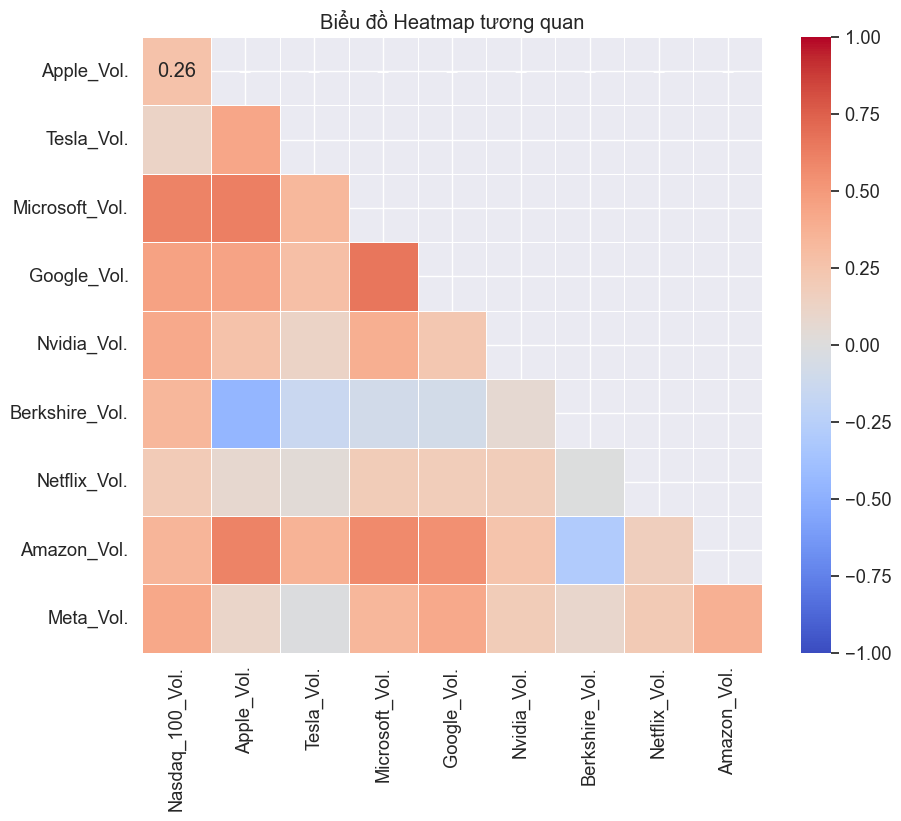

In [126]:
heatmap_corr(df_corr_volume)

In [127]:
fig = px.line(data_frame=df_volume,title='Khối lượng giao dịch hàng ngày tổng quát')
fig.show()

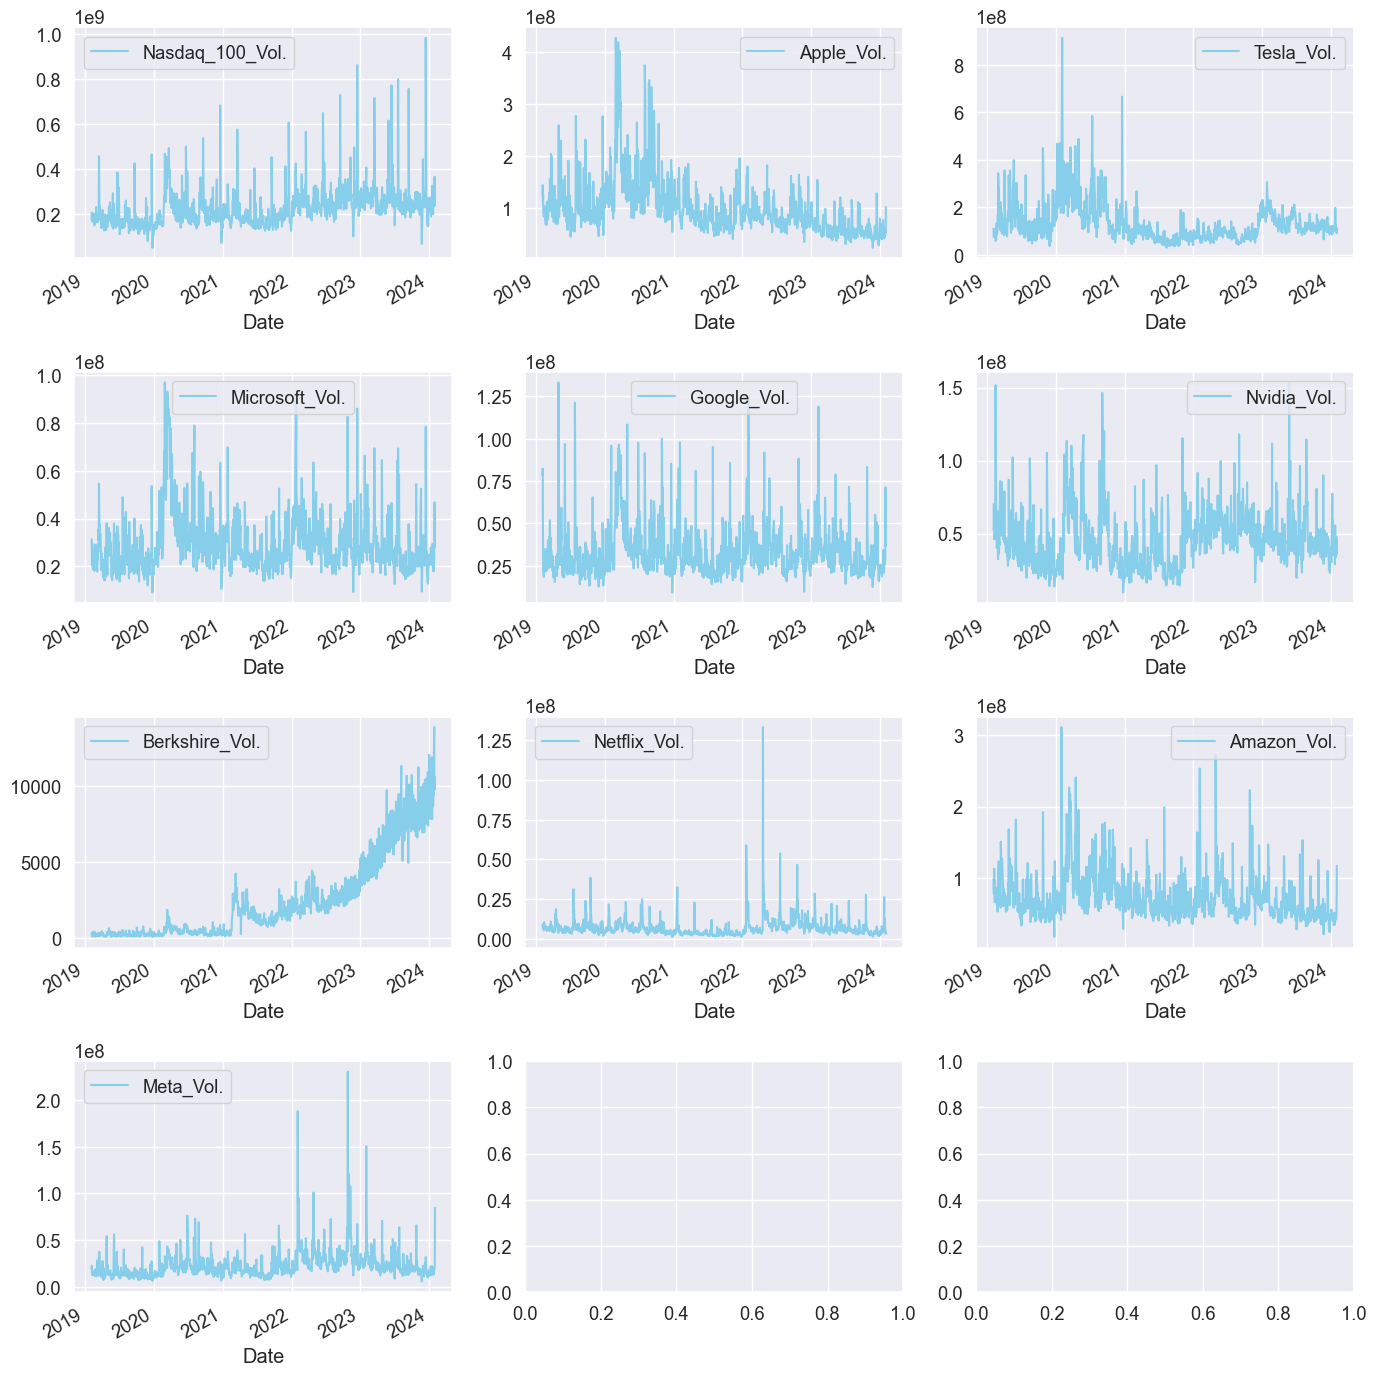

In [128]:
n_cols = 3
n_rows = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*9, n_rows*9))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # index to loop through list "cols"
        if i < len(volume):
            ax_i = ax[r, c]
            df.plot(y=volume[i], figsize=(14,14), ax=ax_i,color='skyblue')
plt.tight_layout()
plt.show()

In [129]:
 df_volume_sum = df_volume.sum()
 df_volume_sum = df_volume_sum.reset_index()
 df_volume_sum.columns = ['Stock', 'Sum Volume']
 fig = px.bar(df_volume_sum, y='Stock', x='Sum Volume', title='Tổng khối lượng cổ phiếu của các công ty')
 fig.show()

In [130]:
 df_volume_mean = df_volume.mean()
 df_volume_mean = df_volume_mean.reset_index()
 df_volume_mean.columns = ['Stock', 'Mean Volume']
 fig = px.bar(df_volume_mean, y='Stock', x='Mean Volume', title='Trung bình khối lượng mua cổ phiếu của các công ty')
 fig.show()


In [131]:
df_volume_std = df_volume.std()
df_volume_std = df_volume_std.reset_index()
df_volume_std.columns = ['Stock', 'STD Volume']
fig = px.bar(df_volume_std, x='Stock', y='STD Volume', title='Biến động khối lượng cổ phiếu của các công ty')
fig.show()

In [154]:
df_trading_value = df.drop(columns=['S&P_500_Price','Nasdaq_100_Price', 'Nasdaq_100_Vol.'])
columns = df_trading_value.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
stock= [x.replace('Vol.','') for x in volume]

In [155]:
trading_value = [x + 'Trading_Value' for x in stock]
trading_values_sum={}
for i in stock:
    df_trading_value[i+'Trading_Value'] = df_trading_value[f'{i}Price'] * df_trading_value[f'{i}Vol.']
    trading_values_sum[i] = (df_trading_value[f'{i}Price'] * df_trading_value[f'{i}Vol.']).sum()

In [156]:
fig = px.line(df_trading_value[trading_value],title="Giá trị giao dịch từng ngày ")
fig.show()

In [157]:
df_trading_values_sum = pd.DataFrame(list(trading_values_sum.items()), columns=['Stock', 'Total Trading Value'])
fig = px.bar(df_trading_values_sum, x='Stock', y='Total Trading Value', title='Tổng giá trị giao dịch cho từng cổ phiếu' )
fig.show()